In [13]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [14]:
def moving_avg(arr, window=3):
    arr2 = np.zeros_like(arr).astype(np.float32)
    for i in range(0,window-1):
        arr2[i] = arr[:i+1].mean()
    for i in range(window-1,len(arr)):
        arr2[i] = arr[i-window+1:i+1].mean()
    return arr2
#moving_avg(input_arr[1],5)
#input_arr
    

In [ ]:
mycore = 4
desiredslice=3
datalist = pickle.load(open('core'+str(mycore)+'ToSlice'+str(desiredslice)+'.pkl', 'rb'))

In [ ]:
targets = []
inputs = []
offset = 31
threshold = 42+offset
for data in datalist:
    for i in range(1,len(data)):
        bit, trace = data[i]
        if data[i-1][0] == 0:
            continue
        if len(trace) >= threshold:
            targets.append(bit)
            inputs.append(list(trace[:threshold]))
        elif len(trace) >= threshold//2 and i < len(data)-1 and len(data[i+1][1]) + len(trace) >= threshold:
            pass
            #targets.append(bit)
            #inputs.append(list(trace) + list(data[i+1][1][:threshold-len(trace)]))
            
target_arr = np.array(targets)
input_arr = np.array(inputs)
print(len(input_arr))
print(target_arr.sum())

In [ ]:

fig = plt.figure(figsize=(15,15))
seed = np.random.randint(len(targets)-10)
for idx in range(1,10):
    rn = seed + idx
    ax1 = fig.add_subplot(3,3,idx)
    ax1.set_title(str(targets[rn]))
    xaxis = np.arange(1,threshold+1-31)
    #yaxis = moving_avg(input_arr[rn][31:],3)
    yaxis = input_arr[rn][31:]
    print(input_arr[rn].mean())
    ax1.plot(xaxis,yaxis)
    axes = plt.gca()
    #axes.set_ylim([145,220])
fig.show()

In [ ]:
train_x = []
train_y = []
test_x = []
test_y = []

mn = input_arr.mean()
st = input_arr.std()

for i in range(len(target_arr)):
    #mn = input_arr[i].mean()
    #st = input_arr[i].std()
    xdata = (input_arr[i]-mn)/st
    if i%4 == 0:
        test_x.append(xdata[31:])
        test_y.append(target_arr[i])
    else:
        train_x.append(xdata[31:])
        train_y.append(target_arr[i])
len(test_x)

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)
#tpred_y = clf.predict(train_x)
(pred_y == test_y).sum()/len(pred_y)
#(tpred_y == train_y).sum()/len(train_y)

In [ ]:
from sklearn.metrics import f1_score
f1_score(test_y, pred_y)

In [ ]:
lens = [(len(d[1]),d[0]) for d in data]

In [ ]:
lens

In [ ]:
input_arr.mean()

In [ ]:
import torch
def shifter(arr, window=32):
    dup = arr.expand(arr.size(0), arr.size(1)+1, arr.size(1))
    dup2 = dup.reshape(arr.size(0), arr.size(1), arr.size(1)+1)
    shifted = dup2[:,:,:window]
    return shifted
print(shifter(torch.arange(42).view(1,42)))

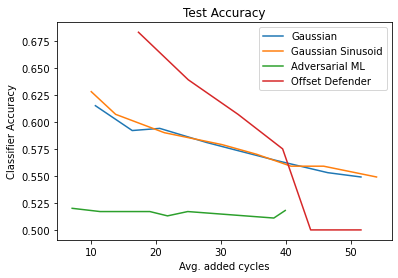

In [20]:
gaup = [1.33, 2.04, 2.57, 3.47, 4.03, 4.84, 5.81, 6.45]
gaup = np.array(gaup)*8
gaua = [0.615, 0.592, 0.594, 0.581, 0.574, 0.564, 0.553, 0.549]

sinp = [1.25, 1.72, 2.66, 3.77, 4.44, 5.10, 5.73, 6.75]
sinp = np.array(sinp)*8
sina = [0.628, 0.607, 0.590, 0.579, 0.570, 0.559, 0.559, 0.549]

advp = [0.882, 1.420, 2.38, 2.72, 3.11, 4.77, 4.99]
advp = np.array(advp)*8
adva = [0.520, 0.517, 0.517, 0.513, 0.517, 0.511, 0.518]

offp = [2.16, 3.12, 4.08, 4.94, 5.48, 6.45]
offp = np.array(offp)*8
offa = [0.683, 0.639, 0.607, 0.575, 0.5, 0.5]
fig = plt.figure()
plt.plot(gaup, gaua, label = "Gaussian")

plt.plot(sinp, sina, label = "Gaussian Sinusoid")

plt.plot(advp, adva, label = "Adversarial ML")

plt.plot(offp, offa, label = "Offset Defender")

plt.xlabel('Avg. added cycles')
# Set the y axis label of the current axis.
plt.ylabel('Classifier Accuracy')
# Set a title of the current axes.
plt.title('Test Accuracy')
# show a legend on the plot
plt.legend()
# Display a figure.
#plt.show()
plt.savefig('curve.pdf', format='pdf')

In [ ]:
mat = [[0.515, 0.597, 0.602], [0.517, 0.535, 0.518], [0.508, 0.5, 0.517]]
fig, ax = plt.subplots()
ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))
ax.set_xticklabels(['MLP', 'RNN', 'CNN'])
ax.set_yticklabels(['MLP', 'RNN', 'CNN'])
ax.imshow(mat, cmap=cm.Greys_r, norm=None)
plt.show()

In [3]:
def shifter(arr, window=32):
    dup = arr[:,None,:].expand(arr.size(0), arr.size(1)+1, arr.size(1))
    dup2 = dup.reshape(arr.size(0), arr.size(1), arr.size(1)+1)
    shifted = dup2[:,:window,:-window]
    return shifted

In [21]:
import RingDataset
from Models import CNNModel, RNNModel, RNNGenerator, MLP
import torch
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split
import torch.nn as nn

testdata = RingDataset.RingDataset('core4ToSlice3_test.pkl', threshold=42)
randloader = DataLoader(testdata, batch_size=4, shuffle=True)
generator = RNNGenerator(42, scale=0.25, dim=256)
generator.load_state_dict(torch.load('./models/adv_256_0.882_0.520.pth'))
loaditer = iter(randloader)

4.576230049133301
8.188518524169922
6.622488975524902
10.90711784362793


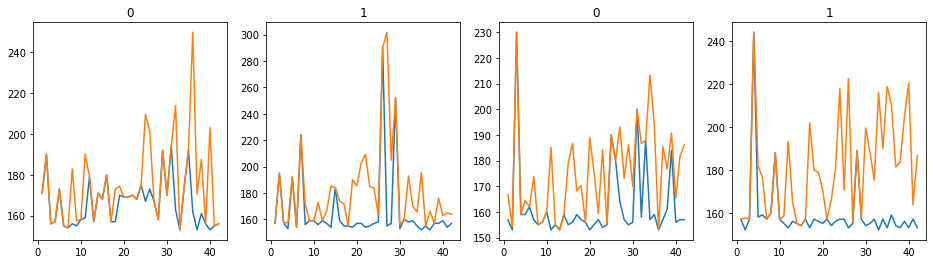

In [28]:
import numpy as np
import matplotlib.pyplot as plt
x,y = next(loaditer)
shifted = shifter(x)
perturb = generator(shifted).view(shifted.size(0),-1)
original = x[:,31:]
added = original+perturb.detach()
fig = plt.figure(figsize=(16,4))
for idx in range(1,5):
    ax1 = fig.add_subplot(1,4,idx)
    ax1.set_title(str(y[idx-1].item()))
    xaxis = np.arange(1,43)
    yaxis = original[idx-1]*testdata.std + testdata.med
    ax1.plot(xaxis,yaxis)
    yaxis2 = added[idx-1]*testdata.std + testdata.med
    ax1.plot(xaxis,yaxis2)
    axes = plt.gca()
    #print(perturb[idx-1]*8)
    print(perturb[idx-1].mean().item()*8)
    #axes.set_ylim([145,220])
fig.show()

In [29]:
fig.savefig('perturb.pdf', format='pdf')